# 1) Import Libraries

In [1]:
import os
import pandas as pd
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import cv2
from sklearn.preprocessing import LabelEncoder
import numpy as np
import shutil


pd.set_option("display.max_rows", 30)
pd.set_option('max_colwidth', 400)

# 2) Scan and import directories of pictures

In [2]:
def check_location_exists(location, throw_error_if_no_exist, delete_if_exists_flag):
    if not os.path.exists(location):
        if throw_error_if_no_exist:
            raise FileNotFoundError('Could not find data folder, please create a folder named \"Datasets\" and place test, train and val folders (Seperate folders named with class names) within!\\nExample: Datasets\\\\test\\\\cats\\\\1.jpg')
        else:
            os.makedirs(location)
    else:
        if delete_if_exists_flag:
            shutil.rmtree(location)
            os.makedirs(location)

In [3]:
# Obtain Current Working Directory
currentworking_directory = os.getcwd()
currentworking_directory

'd:\\Files\\GitHub\\General_Image_Classifier'

In [4]:
# Data Directory
data_directory = currentworking_directory + "\Datasets"

# Check if it exists, and if not, throw an error
check_location_exists(data_directory, 1, 0)

In [5]:
file_list = []
root_list = []
dirs_list = []
# Scan the folder for pictures
for root, dirs, files in os.walk(data_directory):
  dirs.sort()
  for name in files:
    file_list.append(os.path.join(root, name))
    root_list.append(root)
    dirs_list.append(dirs)

# Put all the directories of detected files in a directory
Data_Directory_df = pd.DataFrame(file_list, columns=['Directory'])

In [6]:
# Find index of Dataset Folder and dataset_type
split_directory = Data_Directory_df['Directory'].str.split('\\')[0]
datasetfolder_index = split_directory.index('Datasets')
datasettype_index = datasetfolder_index + 1
classtype_index =  datasetfolder_index + 2

In [7]:
Data_Directory_df['Set'] = Data_Directory_df['Directory'].str.split('\\').str[datasettype_index]
Data_Directory_df['Class'] = Data_Directory_df['Directory'].str.split('\\').str[classtype_index]

# 3) View the Data_Directory Dataframe

## Split the data into test and trainval

In [8]:
test_Data_Directory_df = Data_Directory_df.loc[Data_Directory_df['Set'] == 'test'].reset_index(drop=True).copy()
val_train_Data_Directory_df = Data_Directory_df.loc[(Data_Directory_df['Set'] == 'train') | (Data_Directory_df['Set'] == 'val')].reset_index(drop=True).copy()

## Obtain class and append as class_id

In [9]:
# Make the label encoder object
label_encoder = LabelEncoder()

# Obtain the list of classes
classes = list(val_train_Data_Directory_df.Class)

# Assign a number to each class
integer_encoded = label_encoder.fit_transform(classes)

# Add it to the val_train data
val_train_Data_Directory_df['Class_ID'] = integer_encoded

# Add nan class_ID to test data
test_Data_Directory_df['Class_ID'] = np.NaN
test_Data_Directory_df['Class'] = np.NaN

## Obtain which class_id corresponds to which class

In [10]:
# Obtain which class_id correspond to which class
class_groups = val_train_Data_Directory_df.groupby('Class_ID')
Unique_Classes = {}
for key in class_groups.groups.keys():
    Unique_Classes[key] = class_groups.get_group(key)['Class'].iloc[0]
class_df = pd.DataFrame(Unique_Classes.values(), columns=['Class'])
class_df

,Class
0,cat
1,dog


## Split the val and train dataset

In [11]:
val_Data_Directory_df = val_train_Data_Directory_df.loc[val_train_Data_Directory_df['Set'] == 'val'].copy()
train_Data_Directory_df = val_train_Data_Directory_df.loc[val_train_Data_Directory_df['Set'] == 'train'].copy()

## Obtain the ID of the test set pictures

In [12]:
test_Data_Directory_df['ID'] = test_Data_Directory_df['Directory'].str.split("\\").str[-1].str[:-4].astype(int)

In [13]:
test_Data_Directory_df.sort_values(by='ID', inplace=True)
test_Data_Directory_df.reset_index(drop=True, inplace=True)
test_Data_Directory_df = test_Data_Directory_df[['Directory', 'Set', 'ID', 'Class', 'Class_ID']]
test_Data_Directory_df

,Directory,Set,ID,Class,Class_ID
0,d:\Files\GitHub\General_Image_Classifier\Datasets\test\1.jpg,test,1,NaN,NaN
1,d:\Files\GitHub\General_Image_Classifier\Datasets\test\2.jpg,test,2,NaN,NaN
2,d:\Files\GitHub\General_Image_Classifier\Datasets\test\3.jpg,test,3,NaN,NaN
3,d:\Files\GitHub\General_Image_Classifier\Datasets\test\4.jpg,test,4,NaN,NaN
4,d:\Files\GitHub\General_Image_Classifier\Datasets\test\5.jpg,test,5,NaN,NaN
...,...,...,...,...,...
495,d:\Files\GitHub\General_Image_Classifier\Datasets\test\496.jpg,test,496,NaN,NaN
496,d:\Files\GitHub\General_Image_Classifier\Datasets\test\497.jpg,test,497,NaN,NaN
497,d:\Files\GitHub\General_Image_Classifier\Datasets\test\498.jpg,test,498,NaN,NaN
498,d:\Files\GitHub\General_Image_Classifier\Datasets\test\499.jpg,test,499,NaN,NaN


In [14]:
train_Data_Directory_df.reset_index(inplace=True, drop=True)
train_Data_Directory_df

,Directory,Set,Class,Class_ID
0,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.0.jpg,train,cat,0
1,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.1.jpg,train,cat,0
2,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.10.jpg,train,cat,0
3,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.10001.jpg,train,cat,0
4,d:\Files\GitHub\General_Image_Classifier\Datasets\train\cat\cat.10002.jpg,train,cat,0
...,...,...,...,...
19995,d:\Files\GitHub\General_Image_Classifier\Datasets\train\dog\dog.9993.jpg,train,dog,1
19996,d:\Files\GitHub\General_Image_Classifier\Datasets\train\dog\dog.9994.jpg,train,dog,1
19997,d:\Files\GitHub\General_Image_Classifier\Datasets\train\dog\dog.9995.jpg,train,dog,1
19998,d:\Files\GitHub\General_Image_Classifier\Datasets\train\dog\dog.9998.jpg,train,dog,1


In [15]:
val_Data_Directory_df.reset_index(inplace=True, drop=True)
val_Data_Directory_df

,Directory,Set,Class,Class_ID
0,d:\Files\GitHub\General_Image_Classifier\Datasets\val\cat\cat.100.jpg,val,cat,0
1,d:\Files\GitHub\General_Image_Classifier\Datasets\val\cat\cat.1000.jpg,val,cat,0
2,d:\Files\GitHub\General_Image_Classifier\Datasets\val\cat\cat.10000.jpg,val,cat,0
3,d:\Files\GitHub\General_Image_Classifier\Datasets\val\cat\cat.10010.jpg,val,cat,0
4,d:\Files\GitHub\General_Image_Classifier\Datasets\val\cat\cat.10017.jpg,val,cat,0
...,...,...,...,...
4995,d:\Files\GitHub\General_Image_Classifier\Datasets\val\dog\dog.9979.jpg,val,dog,1
4996,d:\Files\GitHub\General_Image_Classifier\Datasets\val\dog\dog.9984.jpg,val,dog,1
4997,d:\Files\GitHub\General_Image_Classifier\Datasets\val\dog\dog.9992.jpg,val,dog,1
4998,d:\Files\GitHub\General_Image_Classifier\Datasets\val\dog\dog.9996.jpg,val,dog,1


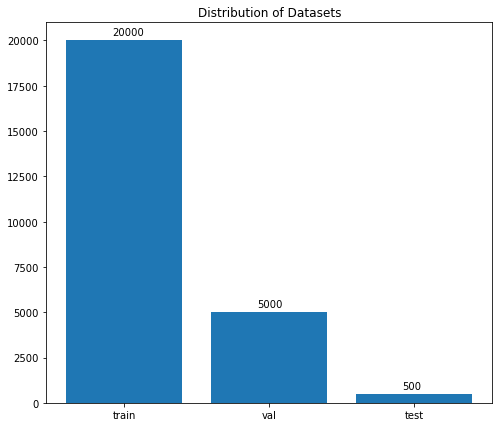

In [16]:
datasettypes_counts = Data_Directory_df.Set.value_counts()

plt.figure(figsize=(8,7))
x_labels = datasettypes_counts.keys()
plt.bar(x = x_labels, height = datasettypes_counts)
plt.title(label = 'Distribution of Datasets')
for i,j in zip(x_labels,datasettypes_counts):
    plt.annotate('%s' %j, xy=(i,j), xytext=(-12,5), textcoords='offset points')

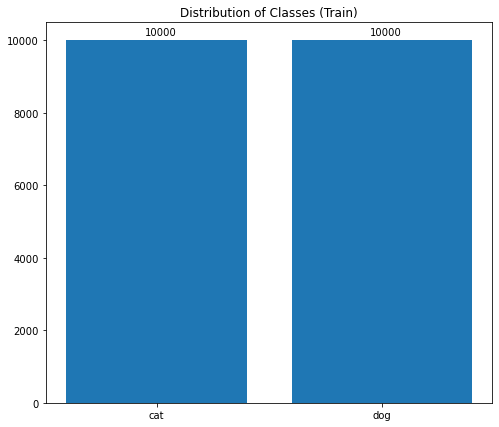

In [17]:
datasettypes_counts = train_Data_Directory_df.Class.value_counts()

plt.figure(figsize=(8,7))
x_labels = datasettypes_counts.keys()
plt.bar(x = x_labels, height = datasettypes_counts)
plt.title(label = 'Distribution of Classes (Train)')
for i,j in zip(x_labels,datasettypes_counts):
    plt.annotate('%s' %j, xy=(i,j), xytext=(-12,5), textcoords='offset points')

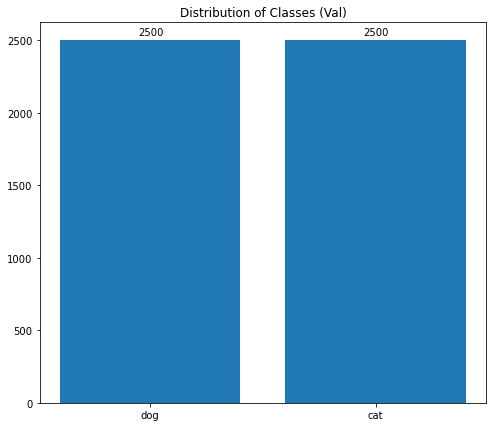

In [18]:
datasettypes_counts = val_Data_Directory_df.Class.value_counts()

plt.figure(figsize=(8,7))
x_labels = datasettypes_counts.keys()
plt.bar(x = x_labels, height = datasettypes_counts)
plt.title(label = 'Distribution of Classes (Val)')
for i,j in zip(x_labels,datasettypes_counts):
    plt.annotate('%s' %j, xy=(i,j), xytext=(-12,5), textcoords='offset points')

# 4) Show an image

In [19]:
def image_view(file_path): 
    im = cv2.imread(file_path)
    im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.title(label = file_path.split("\\")[-1] + ' (' + file_path.split("\\")[-2] + ')')
    plt.axis('off')

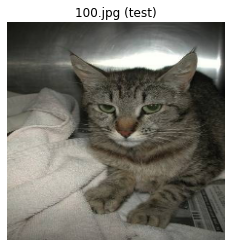

In [20]:
image_directory = Data_Directory_df['Directory'][2]
image_view(image_directory)

# 5) Resize Images

In [21]:
def resize_images_in_folder(img_size, import_folder_directory_df, output_folder_directory):
    
    directories = []
    num_of_files = len(import_folder_directory_df)
    for index in range(0, num_of_files):
        file_path = import_folder_directory_df.Directory[index]
        newfile_name = str(index) + '.jpg'
        newfile_path = output_folder_directory + '\\' + newfile_name
        im =  cv2.imread(file_path)
        new_im = cv2.resize(im, (img_size, img_size))
        cv2.imwrite(newfile_path, new_im)
        directories.append(newfile_path)

    import_folder_directory_df['Resized_Directory'] = pd.Series(directories)

    return import_folder_directory_df

In [22]:
processingdata_directory = currentworking_directory + "\\processing"
valdata_directory = currentworking_directory + "\\processing\\val"
testdata_directory = currentworking_directory + "\\processing\\test"
traindata_directory = currentworking_directory + "\\processing\\train"

In [23]:
check_location_exists(processingdata_directory, 0, 1)
check_location_exists(valdata_directory, 0, 1)
check_location_exists(testdata_directory, 0, 1)
check_location_exists(traindata_directory, 0, 1)

In [24]:
img_size = 64
val_Data_Directory_df = resize_images_in_folder(img_size, val_Data_Directory_df, valdata_directory)
train_Data_Directory_df = resize_images_in_folder(img_size, train_Data_Directory_df, traindata_directory)
test_Data_Directory_df = resize_images_in_folder(img_size, test_Data_Directory_df, testdata_directory)

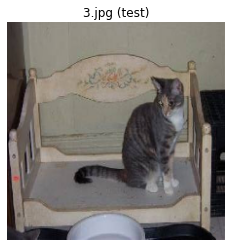

In [25]:
image_directory = test_Data_Directory_df['Directory'][2]
image_view(image_directory)

# 6) Export Dataframes

In [26]:
val_Data_Directory_df.to_hdf('val_Data_Directory_df.h5', key='hdf')
train_Data_Directory_df.to_hdf('train_Data_Directory_df.h5', key='hdf')
test_Data_Directory_df.to_hdf('test_Data_Directory_df.h5', key='hdf')
class_df.to_hdf('class_df.h5', key='hdf')